### Transforming Numerical Features
* In case of linear and logistic regression models, features should be Gaussian/normally distributed for better performance
* Apply mathematical transformations to change any type of distribution into Gaussian distribution
* Commonly used mathematical transformations - logarithm, reciprocal, power, square root, cube root, Box-Cox and Yeo-Johnson

### 1. Transforming features with logarithm function
* $\textbf{Drawback}$ - can't be applied to features which contain negative values

### 2. Transforming features with reciprocal function
* $\textbf{Drawback}$ - can't be applied to features which contain zero values

### 3. Transforming features with square root function
* It is a specific form of power transformation where the exponent is 1/2
* $\textbf{Drawback}$ - can't be applied to features which contain negative values

### 4. Transforming features with cube root function
* It is a specific form of power transformation where the exponent is 1/3
* $\textbf{Drawback}$ - can't be applied to features which contain negative values

### 5. Transforming features with power or exponential function
* In practice, we try different exponents to determine which one offers the best transformation

### 6. Transforming features with Box-Cox function
* It is defined by $\frac{X^{\lambda}-1}{\lambda}$ if $ X > 0 $ or $log(X)$ if $ X = 0 $, where $X$ is the variable and $\lambda$ is the transformation parameter
* several values of $\lambda$ are considered and the $\lambda$ that returns the best transformation is selected
* $\textbf{Drawback}$ - can't be applied to features which contain negative values

### 7. Transforming features with Yeo-Johnson function
* It is an extension of Box-Cox transformation and can be applied to features with zero, negative and positive values

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer as PowerTransformer_sklearn
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer

C:\Users\Honey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

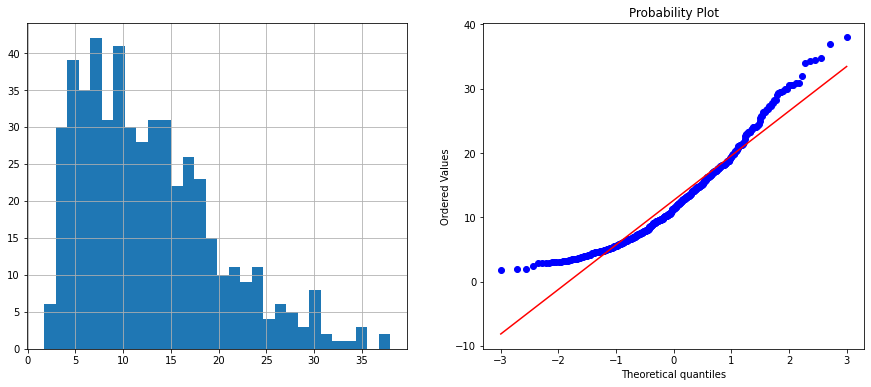

In [2]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data,columns = boston_dataset.feature_names)

def diagnostic_plots(df,feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[feature].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist="norm",plot=plt)
    plt.show()
    
diagnostic_plots(df,"LSTAT") # use this funciton to verify the distribution of variables


### Transformation with NumPy


In [3]:
df_numpy = df.copy()
df_numpy[["LSTAT", "NOX", "DIS", "RM"]] = np.log(df[["LSTAT", "NOX", "DIS", "RM"]])
df_numpy[["LSTAT", "NOX", "DIS", "RM"]] = np.reciprocal(df[["LSTAT", "NOX", "DIS", "RM"]])
df_numpy[["LSTAT", "NOX", "DIS", "RM"]] = np.sqrt(df[["LSTAT", "NOX", "DIS", "RM"]])
df_numpy[["LSTAT", "NOX", "DIS", "RM"]] = np.cbrt(df[["LSTAT", "NOX", "DIS", "RM"]])
df_numpy[["LSTAT", "NOX", "DIS", "RM"]] = np.power(df[["LSTAT", "NOX", "DIS", "RM"]],0.3)

# scipy.stats.boxcox() or scipy.stats.yeojohnson() can only be applied to one variable at a time, and returns two parameters:
# the transformed variable and the optimal lambda for the transformation, which we capture in the param variable
df_numpy['LSTAT'], param = stats.boxcox(df["LSTAT"])
df_numpy['LSTAT'], param = stats.yeojohnson(df["LSTAT"])


### Transformation with scikit-learn

In [4]:
df_sklearn = df.copy()
# FunctionTransformer() doesn't need to be fit before transforming data
# since there are no parameters to be learned from train set
transformer = FunctionTransformer(np.log)
transformer = FunctionTransformer(np.reciprocal)
transformer = FunctionTransformer(np.sqrt)
transformer = FunctionTransformer(np.cbrt)
transformer = FunctionTransformer(lambda x : np.power(x,0.3))

df_sklearn[["LSTAT", "NOX", "DIS", "RM"]] = transformer.transform(df[["LSTAT", "NOX", "DIS", "RM"]])
 
# PowerTransformer() need to be fit before transforming data
transformer = PowerTransformer_sklearn(method='box-cox', standardize=False)
transformer = PowerTransformer_sklearn(method='yeo-johnson', standardize=False)

transformer.fit(df[['LSTAT', 'NOX', 'DIS', 'RM']])
transformer.lambdas_ # shows optimum value of lamdba
df_sklearn_series = transformer.transform(df[['LSTAT', 'NOX', 'DIS', 'RM']])
df_sklearn = pd.DataFrame(df_sklearn_series,columns=['LSTAT', 'NOX', 'DIS', 'RM'])

### Transformation with Feature-engine


In [5]:
# If variables = None, transformer identifies and applies the transformation to all the numerical variables in the dataset
transformer = LogTransformer(variables=["LSTAT", "NOX", "DIS", "RM"])
transformer = ReciprocalTransformer(variables=["LSTAT", "NOX", "DIS", "RM"])
transformer = PowerTransformer(variables=["LSTAT", "NOX", "DIS", "RM"],exp=1/2)
transformer = PowerTransformer(variables=["LSTAT", "NOX", "DIS", "RM"],exp=1/3)
transformer = PowerTransformer(variables=["LSTAT", "NOX", "DIS", "RM"],exp=0.3)
transformer = BoxCoxTransformer(variables=["LSTAT", "NOX", "DIS", "RM"])
transformer = YeoJohnsonTransformer(variables=["LSTAT", "NOX", "DIS", "RM"])

transformer.fit(df)
transformer.lambda_dict_ # should be used only for box-cox and yeo-johnson functions
df_feature_engine = transformer.transform(df)